training과 test가 나뉘어져 있다.


In [2]:
import os
import re
import torch
import pandas as pd
import matplotlib.pyplot as plt
# from transformers import AutoTokenizaer, AutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification


Column = reviewr_id, store_name, category, store_address, latitude, longtitude, rating_count, review_time, review, rating

latitude, longtitude = 위도, 경도는 불필요

review(data) -> rating(label)

----------------------------------------------------

1. review 에 인코딩이 안되는 부분이 있음.
2. label에 rating이 없는 것도 존재함. (semi-supervised Learning 할 수도 있지만, 모르니까 pass)
3. column 위치가 제대로 정렬되지 않는 것도 존재.
4. review_time에 rating(star, stars) 존재하면 해당 행에 reiview 사용
5. review 에는 2문장이 담겨져 있다.

In [3]:
data_df = pd.read_csv("/NasData/home/lsh/10.project/data/mcdonalds/McDonald_s_Reviews.csv", encoding = 'latin-1')
data_review = data_df['review'].str.encode("ascii", "ignore").str.decode("utf-8")
# data_df_drop = data_df[['review', 'rating']].dropna()
print(data_review)
print(data_review[21504])


0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was  customer s...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                             The service is very good
33393                           To remove hunger is enough
33394    It's good, but lately it has become very expen...
33395                            they took good care of me
Name: review, Length: 33396, dtype: object
No salads, no chicken fingers, no shakes, no thank you.  Why is McDonald's even still around anymore?


In [4]:
# data_df = pd.read_csv("/NasData/home/lsh/10.project/data/mcdonalds/McDonald_s_Reviews.csv", encoding='cp949')
# data_df = pd.read_csv("/NasData/home/lsh/10.project/data/mcdonalds/McDonald_s_Reviews.csv", encoding='utf-8')
data_df = pd.read_csv("/NasData/home/lsh/10.project/data/mcdonalds/McDonald_s_Reviews.csv", encoding='unicode_escape')
data_df_drop = data_df[['review', 'rating']].dropna()
print(data_df_drop)

                                                  review   rating
0      Why does it look like someone spit on my food?...   1 star
1      It'd McDonalds. It is what it is as far as the...  4 stars
2      Made a mobile order got to the speaker and che...   1 star
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars
4      I repeat my order 3 times in the drive thru, a...   1 star
...                                                  ...      ...
33391                        They treated me very badly.   1 star
33392                           The service is very good  5 stars
33393                         To remove hunger is enough  4 stars
33394  It's good, but lately it has become very expen...  5 stars
33395                          they took good care of me  5 stars

[33396 rows x 2 columns]


In [5]:
data_review = data_df['review']
data_label = data_df_drop['rating']

print(f'1 : {len(data_review)}') 
print(f'2 : {len(data_label)}')

1 : 33396
2 : 33396


In [6]:
check_sample = data_df['review'][26:29]
print(check_sample)

# -> unicode 문제되는 부분은 제거하는 것이 좋을 것으로 사료

26    With all the new upgrades everything looks gre...
27    Doesnï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿...
28    Yet another McDonald's with horrible service a...
Name: review, dtype: object


In [7]:
data_review = data_df['review']
data_label = data_df['rating']
data_reviewer = data_df['reviewer_id']
# print(len(data_label))
# del len
len_label = len(data_label)
data_num1 = []
data_num2 = []
data_num3 = []
data_num4 = []
data_num5 = []
data_miss_num = []
for i in range(len_label):
    # print(i)
    data_num = data_df['rating'][i][0]
    # print(type(data_num1))
    # print(data_num1)
    # if data_num1 == ['1','2','3','4','5']:
    if data_num == '1':
        data_num1.append(i)
    elif data_num == '2':
        data_num2.append(i)
    elif data_num == '3':
        data_num3.append(i)
    elif data_num == '4':
        data_num4.append(i)
    elif data_num == '5':
        data_num5.append(i)
    else:
        data_miss_num.append(i)
        

print(f'data_num1: {len(data_num1)}')
print(f'data_num2: {len(data_num2)}')
print(f'data_num3: {len(data_num3)}')
print(f'data_num4: {len(data_num4)}')
print(f'data_num5: {len(data_num5)}')
print(f'data_miss_num: {len(data_miss_num)}')


# data_label_num = data_df['rating'][0][0]
# data_num = data_label_num[0]
# print(data_label_num)
# print(data_label[2:15])
# print(data_label[18])
# print(data_review[18])
# print(data_label[7])
# print(data_review[7])

# -> 레이블에는 문제가 없다는 것을 확인했음.
# -> visualization 실행할것.

data_num1: 9431
data_num2: 3086
data_num3: 4818
data_num4: 5787
data_num5: 10274
data_miss_num: 0


In [8]:
data_review = data_df['review']
print(f'data_review : {len(data_review)}')
# print(f'data_review.empty : {data_review.empty}')
# print(f'data_review.empty : {data_review.isnull}')
print(f'data_review [3] : {data_review[3]}')

data_label = data_df['rating']
print(f'data_label.empty : {data_label.empty}')
print(f'data_label.isnull : {data_label.isnull}')
# print(f'data_label : {data_label}')
print(f'data_label : {len(data_label)}')
# data_miss_label = 
def true_data_review():
    if data_label is not None:
        true_data_review1 = data_df['review']
        return true_data_review1
data_review = true_data_review()
print(f'true data_review : {data_review}')
print(f'true data_review : {len(data_review)}')


data_review : 33396
data_review [3] : My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p
data_label.empty : False
data_label.isnull : <bound method Series.isnull of 0         1 star
1        4 stars
2         1 star
3        5 stars
4         1 star
          ...   
33391     1 star
33392    5 stars
33393    4 stars
33394    5 stars
33395    5 stars
Name: rating, Length: 33396, dtype: object>
data_label : 33396
true data_review : 0        Why does it look like someone spit on my food?...
1        It'd McDonalds. It is what it is as far as the...
2        Made a mobile order got to the speaker and che...
3        My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4        I repeat my order 3 times in the drive thru, a...
                               ...                        
33391                          They treated me very badly.
33392                      

In [9]:
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

In [10]:
def clean_str(string):
    string = re.sub(r"[^A-Za-z0-9(), !?\'\']"," ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)
    return string.lower()  

In [11]:
data_review_c = [clean_str(x) for x in data_review]
print(f'텍스트 정제 후 :{data_review_c[3]}')
data_review_cc = " ".join(data_review[0].split())
print(f'텍스트 분리 후 : {data_review_cc}')

텍스트 정제 후 :my mc crispy chicken sandwich was customer service was quick and p
텍스트 분리 후 : Why does it look like someone spit on my food? I had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.


In [12]:
print('Raw text: ', data_review[0])
print('Tokenized: ', tokenizer.tokenize(data_review[0]))

Raw text:  Why does it look like someone spit on my food?
I had a normal transaction,  everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clear substance is all over my food, i d*** sure am not coming back.
Tokenized:  ['why', 'does', 'it', 'look', 'like', 'someone', 'sp', '##it', 'on', 'my', 'food', '?', 'i', 'had', 'a', 'normal', 'transaction', ',', 'everyone', 'was', 'chi', '##ll', 'and', 'poli', '##te', ',', 'but', 'now', 'i', 'dont', 'want', 'to', 'eat', 'this', '.', 'im', 'trying', 'not', 'to', 'think', 'about', 'what', 'this', 'milk', '##y', 'white', '/', 'clear', 'substance', 'is', 'all', 'over', 'my', 'food', ',', 'i', 'd', '*', '*', '*', 'sure', 'am', 'not', 'coming', 'back', '.']


In [13]:
# encoded_input = tokenizer(str(data_df['review'][10:15]))
encoded_input = tokenizer(str(data_df.iloc[8]))
# encoded_input = tokenizer(data_df.iloc[8][10:15])
print(len(encoded_input))
print(encoded_input)

3
{'input_ids': [101, 12893, 10177, 142, 12249, 130, 12913, 142, 11221, 31142, 112, 161, 24716, 14024, 15225, 21688, 12913, 142, 27420, 96040, 11518, 10763, 118, 21580, 150, 12997, 117, 19007, 117, 69113, 49959, 27858, 117, 10681, 10821, 50242, 10225, 119, 26189, 87934, 11544, 91187, 118, 12527, 119, 53955, 11544, 11444, 11124, 28137, 142, 22949, 122, 117, 15422, 12893, 142, 10573, 124, 15781, 30526, 12893, 13661, 29263, 11859, 15834, 29263, 11859, 119, 23608, 119, 27948, 11402, 10181, 119, 119, 119, 28137, 122, 11424, 11221, 131, 129, 117, 24675, 74841, 10111, 131, 15292, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [14]:
encoded_input = tokenizer(str(data_review))
encoded_review = encoded_input['input_ids']
len(encoded_input)
len(encoded_review)


163

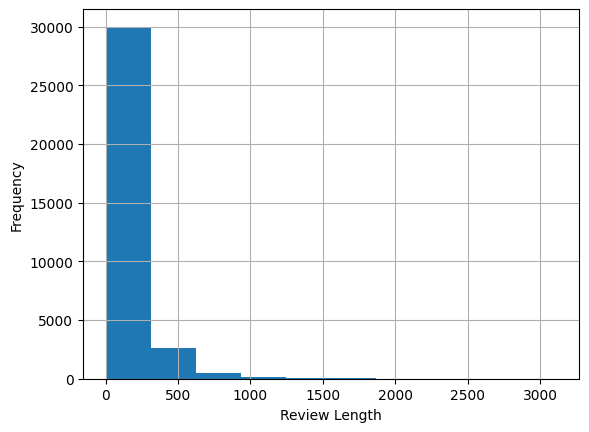

In [15]:
# plot the data distribution
# max length

data_df['review'].str.len().hist()
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# plt.hist([len(review) for review in data_df.iloc[8]], bins = 50)
# plt.xlabel('length of samples')
# plt.ylabel('number of samples')
# plt.show()

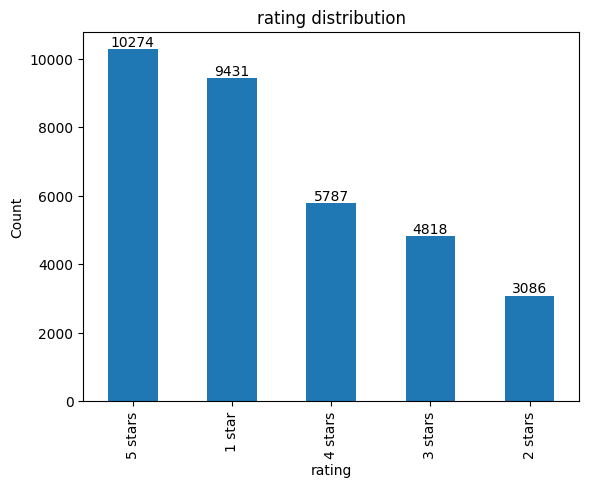

In [16]:
data_df = pd.read_csv("/NasData/home/lsh/10.project/data/mcdonalds/McDonald_s_Reviews.csv", encoding='unicode_escape')
data_df['rating'].value_counts().plot(kind='bar')
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('Count')
for i in range(len(data_df['rating'].value_counts())):
    plt.text(i, data_df['rating'].value_counts()[i], data_df['rating'].value_counts()[i], ha='center', va='bottom')

plt.show()

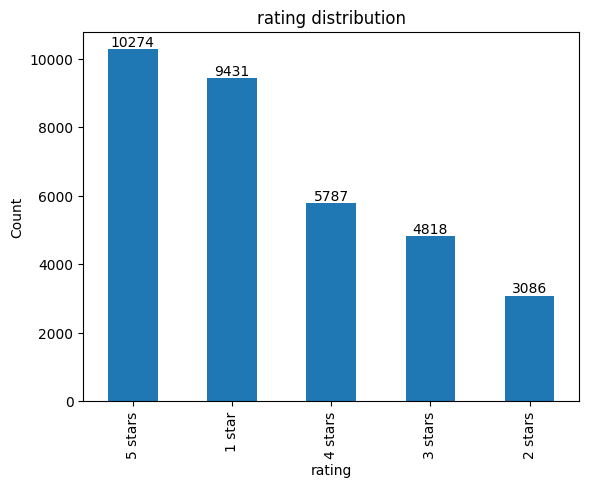

In [17]:
from sklearn.model_selection import train_test_split

seed = 5657

data_train, data_temp = train_test_split(data_df, test_size=0.4, random_state= seed)
data_valid, data_test = train_test_split(data_temp, test_size = 0.5, random_state = seed)

data_df['rating'].value_counts().plot(kind='bar')
plt.title('rating distribution')
plt.xlabel('rating')
plt.ylabel('Count')
for i in range(len(data_df['rating'].value_counts())):
    plt.text(i, data_df['rating'].value_counts()[i], data_df['rating'].value_counts()[i], ha='center', va='bottom')

plt.show()

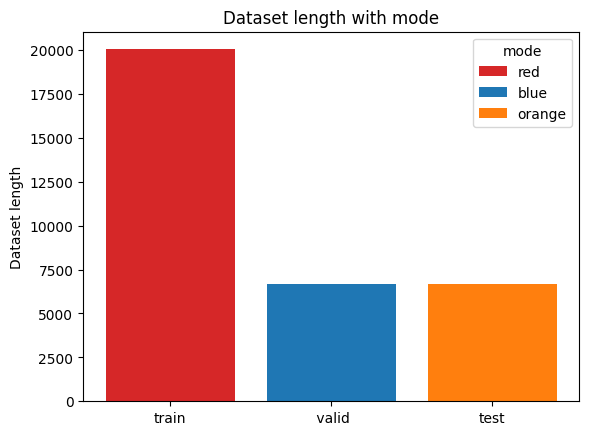

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

dataset = ['train', ' valid', 'test']
counts = [data_train['rating'].count(), data_valid['rating'].count(), data_test['rating'].count()]
bar_labels = ['red', 'blue', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']

ax.bar(dataset, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Dataset length')
ax.set_title('Dataset length with mode')
ax.legend(title='mode')

plt.show()

# length.append(data_train['rating'].value_counts())
# length.append(data_valid['rating'].value_counts())
# length.append(data_test['rating'].value_counts())

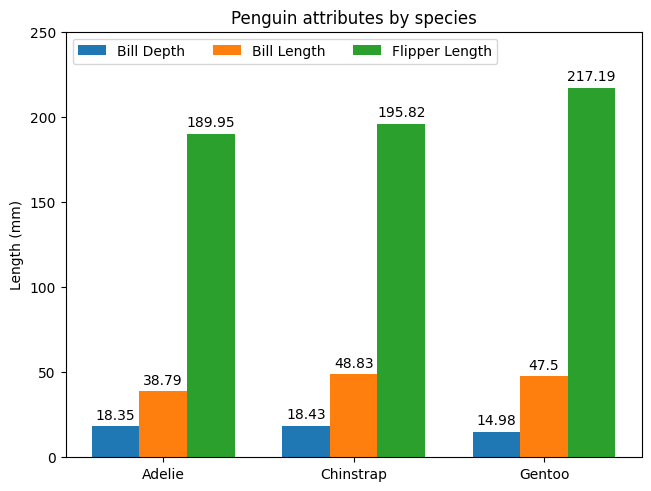

In [19]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()